# Лабораторная работа №3
## Сетевые алгоритмы. Динамические алгоритмы поиска путей.


### Выполнил студент группы БПИ2303 Григорян Илья Мурадович 
- - - 

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

Кратчайшее расстояние от A до E: 6


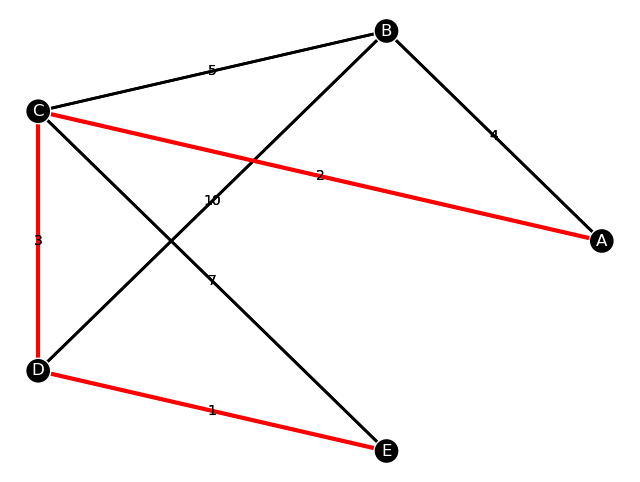

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def bellman_ford(graph, start):
    dist = {vertex: float('inf') for vertex in graph}
    dist[start] = 0
    prev = {vertex: None for vertex in graph}  

    for _ in range(len(graph) - 1):
        for u in graph:
            for v, weight in graph[u].items():
                if dist[u] + weight < dist[v]:
                    dist[v] = dist[u] + weight
                    prev[v] = u

    return dist, prev  

def generate_positions(graph):
    """Автоматически создаёт координаты для вершин, располагая их по окружности."""
    n = len(graph)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    positions = {node: (np.cos(angle), np.sin(angle)) for node, angle in zip(graph.keys(), angles)}
    return positions

def plot_graph(graph, shortest_paths, prev, start, end):
    positions = generate_positions(graph)

    fig, ax = plt.subplots(figsize=(8, 6))

    # Рисуем вершины
    for vertex, (x, y) in positions.items():
        ax.plot(x, y, 'bo', markersize=10)
        ax.text(x, y, vertex, fontsize=12, ha='center', va='center', color='white', bbox=dict(facecolor='black', edgecolor='white', boxstyle='circle'))

    # Рисуем рёбра
    for u in graph:
        for v, weight in graph[u].items():
            x1, y1 = positions[u]
            x2, y2 = positions[v]
            ax.plot([x1, x2], [y1, y2], 'k-', lw=2)
            ax.text((x1 + x2) / 2, (y1 + y2) / 2, f'{weight}', fontsize=10, ha='center', va='center')

    # Отрисовка кратчайшего пути
    if start and end and shortest_paths and prev[end] is not None:
        path = [end]
        while path[-1] != start:
            path.append(prev[path[-1]])  
        path.reverse()  

        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            x1, y1 = positions[u]
            x2, y2 = positions[v]
            ax.plot([x1, x2], [y1, y2], 'ro-', lw=3)

    plt.axis('off')  
    plt.show()

# Пример графа (его можно заменить на любой другой)
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 5, 'D': 10},
    'C': {'A': 2, 'B': 5, 'D': 3, 'E': 7},
    'D': {'B': 10, 'C': 3, 'E': 1},
    'E': {'C': 7, 'D': 1}
}

# Входные параметры
start_vertex = 'A'
end_vertex = 'E'
shortest_paths, prev = bellman_ford(graph, start_vertex)

# Вывод результата и визуализация
if end_vertex in shortest_paths:
    result = shortest_paths[end_vertex]
    print(f"Кратчайшее расстояние от {start_vertex} до {end_vertex}: {result}")
    plot_graph(graph, shortest_paths, prev, start_vertex, end_vertex)
else:
    print(f"Нет пути от {start_vertex} до {end_vertex}")


### Вывод